## Introducción

Como analista de datos, tu objetivo es **evaluar cómo la movilidad urbana se relaciona con la productividad económica en las principales ciudades latinoamericanas**. 
Para ello trabajarás con datos reales de TomTom Traffic Index y OECD Cities, que deberás limpiar, combinar y analizar para identificar en qué ciudades conviene invertir en infraestructura de transporte.

## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de ambos datasets**.
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯Objetivo:**
Importar las librerías necesarias, cargar los archivos CSV en DataFrames y realizar una revisión preliminar para entender su contenido.

**Instrucciones:**
- Importa las librerías `pandas`, `numpy`, `seaborn` y `matplotlib.pyplot`.
- Carga los archivos usando `pd.read_csv()`:
  - `'/datasets/tomtom_traffic.csv'`
  - `/datasets/oecd_city_economy.csv` `.
- Guarda los DataFrames en las variables `traffic` y `eco`.
- Muestra las primeras 5 filas de cada DataFrame.


In [2]:
# importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy             as np 


In [3]:
# cargar archivos
traffic = pd.read_csv('/datasets/tomtom_traffic.csv')
eco = pd.read_csv('/datasets/oecd_city_economy.csv')#completa el código

In [4]:
# mostrar las primeras 5 filas de traffic
traffic.head(5)

,Country,City,UpdateTimeUTC,JamsDelay,TrafficIndexLive,JamsLengthInKms,JamsCount,TrafficIndexWeekAgo,UpdateTimeUTCWeekAgo,TravelTimeLivePer10KmsMins,TravelTimeHistoricPer10KmsMins,MinsDelay
0,ARE,abu-dhabi,2025-01-13 04:01:30.001,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30.000,11.614767,10.265330,1.349437
1,ARE,abu-dhabi,2025-01-13 03:46:00.000,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001,11.003180,10.031544,0.971635
2,ARE,abu-dhabi,2025-01-13 02:46:30.000,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30.000,8.196278,8.196510,-0.000232
3,ARE,abu-dhabi,2025-01-13 01:46:30.001,8.2,2.0,4.1,2.0,2.0,2025-01-06 01:46:30.000,7.723808,7.899046,-0.175238
4,ARE,abu-dhabi,2025-01-13 00:01:30.000,1.1,1.0,0.2,1.0,1.0,2025-01-06 00:01:30.000,8.336363,8.604379,-0.268016


In [5]:
eco.head(5)# mostrar las primeras 5 filas de eco

,Year,City,Country,City GDP/capita,Unemployment %,PM2.5 (μg/m³),Population (M)
0,2023,buenos-aires,Argentina,"15.782,00",6.2%,"15,2","15,30"
1,2023,sao-paulo,Brazil,"14.475,00",9.1%,"29,50","22,50"
2,2023,rio-de-janeiro,Brazil,"13.142,00",9.8%,"19,10","13,60"
3,2023,brasilia,Brazil,"15.999,00",8.3%,"13,50","4,70"
4,2023,salvador,Brazil,"8.761,00",13.1%,"16,00","3,90"


**Tip:** Si no usas `print()` la tabla se vera mejor.


---

## 🧩Paso 2: Explorar, limpiar y preparar los datos

Antes de combinar los datasets, inspecciona su estructura, tipos de datos, columnas y valores faltantes.
Anota las columnas que necesiten limpieza y luego estandariza los nombres de columnas.

### 2.1 Explorar la estructura y tipos de datos

**🎯Objetivo:**
Identificar columnas con tipos incorrectos, distribución y nulos, anotar las columnas que requieren conversión.

**Instrucciones:**

- Usa `.info()` para conocer la estructura de ambos DataFrames.
- Muestra los primeros 3 renglones de cada DF.
- Identifica si los detalles de cada DF estan bien o si requieren correcciones y escribe tus conclusiones en el bloque Markdown.
  - ¿Hay columnas que requieren conversión?¿ Cuáles son? ¿Que tipo de dato ienen y cuál deberían de tener?
  - ¿Hay datos ausentes en alguna columna?


In [6]:
# Examinar la estructura de traffic
traffic.info()
print (traffic.head (3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004464 entries, 0 to 1004463
Data columns (total 12 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Country                         1004464 non-null  object 
 1   City                            1004464 non-null  object 
 2   UpdateTimeUTC                   1004464 non-null  object 
 3   JamsDelay                       1004464 non-null  float64
 4   TrafficIndexLive                1004464 non-null  float64
 5   JamsLengthInKms                 1004464 non-null  float64
 6   JamsCount                       1004464 non-null  float64
 7   TrafficIndexWeekAgo             1004464 non-null  float64
 8   UpdateTimeUTCWeekAgo            1004464 non-null  object 
 9   TravelTimeLivePer10KmsMins      1004464 non-null  float64
 10  TravelTimeHistoricPer10KmsMins  1004464 non-null  float64
 11  MinsDelay                       1004464 non-null  float64
dtype

En la estructura del DF traffic, se observa que:
- Las columnas `UpdateTimeUTC` y `UpdateTimeUTCWeekAgo` son de tipo Object deben ser modificadas a DATETIME
- El directorio de datos indica que  JamsCount deberia ser INTEGER y es un FLOAT

In [7]:
# Examinar la estructura de eco
eco.info()
print (eco.head (3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             30 non-null     int64 
 1   City             30 non-null     object
 2   Country          30 non-null     object
 3   City GDP/capita  30 non-null     object
 4   Unemployment %   30 non-null     object
 5   PM2.5 (μg/m³)    30 non-null     object
 6   Population (M)   30 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.8+ KB
   Year            City    Country City GDP/capita Unemployment %  \
0  2023    buenos-aires  Argentina       15.782,00           6.2%   
1  2023       sao-paulo     Brazil       14.475,00           9.1%   
2  2023  rio-de-janeiro     Brazil       13.142,00           9.8%   

  PM2.5 (μg/m³) Population (M)  
0          15,2          15,30  
1         29,50          22,50  
2         19,10          13,60  


En la estructura del DF eco, se observa que:
- Las columnas `City GDP/capita`, `Unemployment %`, `PM2.5` y `Population` estan como object y deben ser FLOAT 
- ... 

### 2.2 Renombrar columnas

**🎯Objetivo:**
Estandarizar los nombres de columnas para evitar errores y facilitar la unión de los datasets.

**Instrucciones:**

- Cambia los nombres de las columnas para que tengan el formato `snake_case`.
    - `Country` → `country`
    - `UpdateTimeUTC` → `update_time_utc`
- Verifica que los cambios se hayan aplicado correctamente usando `.columns`.


In [8]:
# Estandarizar los nombres de las columnas de traffic
#tu código aquí
traffic = traffic.rename(columns={'Country' : 'country',	'City' : 'city',
                        'UpdateTimeUTC':'update_time_utc',	'JamsDelay' : 'jams_delay',
                        'TrafficIndexLive': 'traffic_index_live',
                        'JamsLengthInKms': 'jams_length_in_kms', 'JamsCount' : 'james_count',
                        'TrafficIndexWeekAgo' : 'traffic_index_week_ago',
                        'UpdateTimeUTCWeekAgo' : 'update_time_utc_week_ago',
                        'TravelTimeLivePer10KmsMins':'travel_time_live_per_10_kms_mins',
                        'TravelTimeHistoricPer10KmsMins':'travel_time_historic_per_10_kms_mins',
                        'MinsDelay':'mins_delay'})
# verificar cambios
traffic.columns

Index(['country', 'city', 'update_time_utc', 'jams_delay',
       'traffic_index_live', 'jams_length_in_kms', 'james_count',
       'traffic_index_week_ago', 'update_time_utc_week_ago',
       'travel_time_live_per_10_kms_mins',
       'travel_time_historic_per_10_kms_mins', 'mins_delay'],
      dtype='object')

In [15]:
# Estandarizar los nombres de las columnas de eco
#tu código aquí
eco = eco.rename (columns={'Year':'year', 'City': 'city', 'Country': 'country', 
                           'City GDP/capita': 'city_gdp_capita', 'Unemployment %':'unemployment_pct',
                           'PM2.5 (μg/m³)':'pm2.5_(μg/m³)', 'Population (M)':'population_m'})
# verificar cambios
eco.columns

Index(['year', 'city', 'country', 'city_gdp_capita', 'unemployment_%',
       'pm2.5_(μg/m³)', 'population_m'],
      dtype='object')


### 2.3 Corregir formatos numéricos y de fecha

**🎯Objetivo:**
Asegurar que las columnas de fechas y valores numéricos estén en formatos correctos para permitir análisis, cálculos y comparaciones precisas.

**Instrucciones:**

- Convierte las columnas de fecha de `traffic` a formato `datetime`. Haz el cambio a prueba de errores.
- En el dataset `eco`, limpia los valores numéricos:
    - En `city_gdp_capita`: elimina separadores de miles (`.`) y reemplaza las comas (`','`) por puntos (`'.'`) antes de convertir a tipo `float`.
    - En `unemployment_pct`: elimina el símbolo de porcentaje (`%`) y reemplaza las comas (`','`) por puntos (`'.'`) antes de convertir a tipo `float`.
    - En `population_m`: reemplaza las comas (`','`) por puntos (`'.'`) antes de convertir a tipo `float`.
- Finalmente, crea una nueva columna llamada `population` multiplicando `population_m` por 1,000,000 para obtener la población total.


<details>
<summary>Haz clic para ver la pista</summary>
para eliminar símbolos, puedes reemplazarlos por un texto vacío.

In [11]:
# Convertir las columnas de traffic a tipo fecha con pd.to_datetime()
traffic['update_time_utc'] = pd.to_datetime(traffic['update_time_utc'], errors='coerce', utc=True)#tu código aquí
traffic['update_time_utc_week_ago'] =pd.to_datetime(traffic['update_time_utc_week_ago'], errors='coerce', utc=True) #tu código aquí

# verificar el cambio
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004464 entries, 0 to 1004463
Data columns (total 12 columns):
 #   Column                                Non-Null Count    Dtype              
---  ------                                --------------    -----              
 0   country                               1004464 non-null  object             
 1   city                                  1004464 non-null  object             
 2   update_time_utc                       1004464 non-null  datetime64[ns, UTC]
 3   jams_delay                            1004464 non-null  float64            
 4   traffic_index_live                    1004464 non-null  float64            
 5   jams_length_in_kms                    1004464 non-null  float64            
 6   james_count                           1004464 non-null  float64            
 7   traffic_index_week_ago                1004464 non-null  float64            
 8   update_time_utc_week_ago              1004464 non-null  datetime64[ns, U

In [16]:
# Limpia separadores y convierte columnas numéricas en eco
eco['city_gdp_capita'] = eco['city_gdp_capita'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)
eco['unemployment_%'] =  eco['unemployment_%'].astype(str).str.replace('%', '').str.replace(',', '.').astype(float)
eco['population_m'] = eco['population_m'].astype(str).str.replace(',', '.').astype(float)

# Calcula la población total en unidades absolutas (Multiplica * 1000000)
eco['population'] = eco['population_m']*1000000

# verificar el cambio
eco.info()
eco.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             30 non-null     int64  
 1   city             30 non-null     object 
 2   country          30 non-null     object 
 3   city_gdp_capita  30 non-null     float64
 4   unemployment_%   30 non-null     float64
 5   pm2.5_(μg/m³)    30 non-null     object 
 6   population_m     30 non-null     float64
 7   population       30 non-null     float64
dtypes: float64(4), int64(1), object(3)
memory usage: 2.0+ KB


,year,city,country,city_gdp_capita,unemployment_%,pm2.5_(μg/m³),population_m,population
0,2023,buenos-aires,Argentina,1578200.0,6.2,"15,2",15.3,15300000.0
1,2023,sao-paulo,Brazil,1447500.0,9.1,"29,50",22.5,22500000.0
2,2023,rio-de-janeiro,Brazil,1314200.0,9.8,"19,10",13.6,13600000.0



---

## 🧩Paso 3: Extraer año y filtrar

Extraer el año permite filtrar la información y trabajar solo con el período más reciente y relevante.

### 3.1 Extraer columna año y filtrar 2024

**🎯Objetivo**
Identificar el año de cada registro y mantener solo los registros del 2024.

**Intrucciones**

- Como el DataFrame `traffic` no tiene una columna de año, utiliza el atributo `.dt.year` sobre su columna de fecha para crear una nueva columna llamada `year`.
- Filtra las filas donde el año sea **2024**.
- Utiliza `.copy()` para crear dos nuevos DataFrames (`traffic_2024` y `eco_2024`) para evitar modificar el dataset original.

In [17]:
# Extraer el año de las fechas en update_time_utc
traffic['update_time_utc'] = traffic['update_time_utc'].dt.year

# Verificar cambio
traffic.head(3)

,country,city,update_time_utc,jams_delay,traffic_index_live,jams_length_in_kms,james_count,traffic_index_week_ago,update_time_utc_week_ago,travel_time_live_per_10_kms_mins,travel_time_historic_per_10_kms_mins,mins_delay
0,ARE,abu-dhabi,2025,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30+00:00,11.614767,10.265330,1.349437
1,ARE,abu-dhabi,2025,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001000+00:00,11.003180,10.031544,0.971635
2,ARE,abu-dhabi,2025,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30+00:00,8.196278,8.196510,-0.000232


In [20]:

# Filtra los registros del año 2024
traffic_2024 = traffic[traffic['update_time_utc'] == 2024].copy()
eco_2024 = eco[eco['year'] == 2024].copy()


# Revisar dataframes nuevos
display(traffic_2024.head())
display(eco_2024.head())


,country,city,update_time_utc,jams_delay,traffic_index_live,jams_length_in_kms,james_count,traffic_index_week_ago,update_time_utc_week_ago,travel_time_live_per_10_kms_mins,travel_time_historic_per_10_kms_mins,mins_delay
302,ARE,abu-dhabi,2024,12.9,5.0,2.5,5.0,2.0,2024-12-24 23:01:30.001000+00:00,8.560399,8.519634,0.040765
303,ARE,abu-dhabi,2024,136.0,21.0,20.6,32.0,3.0,2024-12-24 22:01:30+00:00,10.355732,9.049445,1.306286
304,ARE,abu-dhabi,2024,455.2,31.0,40.4,72.0,4.0,2024-12-24 21:01:30+00:00,11.456878,9.305174,2.151704
305,ARE,abu-dhabi,2024,399.4,27.0,38.0,75.0,6.0,2024-12-24 20:01:30.001000+00:00,11.670062,9.952811,1.717252
306,ARE,abu-dhabi,2024,366.4,28.0,39.8,82.0,9.0,2024-12-24 19:01:00+00:00,11.686322,10.008469,1.677853


,year,city,country,city_gdp_capita,unemployment_%,pm2.5_(μg/m³),population_m,population
15,2024,buenos-aires,Argentina,1811700.0,7.2,"14,50",15.4,15400000.0
16,2024,sao-paulo,Brazil,1470300.0,8.5,"28,00",22.6,22600000.0
17,2024,rio-de-janeiro,Brazil,1334900.0,9.2,"18,40",13.7,13700000.0
18,2024,brasilia,Brazil,1625100.0,7.8,"12,80",4.8,4800000.0
19,2024,salvador,Brazil,889900.0,12.4,"15,20",3.9,3900000.0



---

## 🧩Paso 4: Analizar y resumir datos de movilidad

Como el dataset de tráfico contiene **múltiples registros por ciudad**. En esta parte, calcularás los promedios anuales por ciudad para simplificar el análisis y obtener una visión más clara de las tendencias generales.

### 4.1 Calcular promedios de tráfico por ciudad

**🎯Objetivo:**
Obtener una vista consolidada del tráfico promedio por ciudad y año, para analizar patrones generales sin depender de datos diarios.

**Instrucciones**

- Agrupa los datos por `city`, `country` y `year`.
- Calcula el promedio **solo de las métricas de tráfico más relevantes**: como `jams_delay`, `traffic_index_live`, `jams_length_kms`, `jams_count`, `mins_delay`, y tiempos de viaje (`travel_time_live_per_10kms_mins` y `travel_time_hist_per_10kms_mins`).
- Guarda el resultado como `traffic_city_year_2024`, mantén las columnas como variables (no índices).


<details>
<summary>Haz clic para ver la pista</summary>
Usa ".agg()" para aplicar funciones de promedio. Al final, reinicia el índice para mantener las columnas de la agrupación como variables (no índices).

In [28]:
# Calcular los  promedios de trafico por ciudad, país y año
#Creare una lista para despues pasarla y obtener las metricas
metrics = [
    'jams_delay', 
    'traffic_index_live', 
    'jams_length_in_kms', 
    'james_count', 
    'mins_delay', 
    'travel_time_live_per_10_kms_mins', 
    'travel_time_historic_per_10_kms_mins'
            ]

traffic_city_year_2024 = traffic_2024.groupby(['city', 'country', 'update_time_utc'])[metrics].mean().reset_index()
traffic_city_year_2024 = traffic_city_year_2024.rename(columns={'update_time_utc': 'year'})

# Mostrar resultado
traffic_city_year_2024.head()

,city,country,year,jams_delay,traffic_index_live,jams_length_in_kms,james_count,mins_delay,travel_time_live_per_10_kms_mins,travel_time_historic_per_10_kms_mins
0,a-coruna,ESP,2024,17.935187,15.259774,2.198002,4.934405,0.774172,16.267977,15.493804
1,aachen,DEU,2024,26.732141,20.960314,3.892586,6.601832,0.792968,13.397861,12.604894
2,aarhus,DNK,2024,21.200616,16.575891,2.736736,6.109987,0.495276,15.219292,14.724016
3,abu-dhabi,ARE,2024,171.157315,13.902028,24.507380,47.268019,0.139764,9.829092,9.689328
4,adana,TUR,2024,83.864761,22.541040,11.827331,23.754620,1.129749,15.879694,14.749945


### 🧠 **Momento de reflexión**

¡Excelente trabajo hasta aquí!

Ahora que ya tienes los promedios anuales por ciudad, es momento de **observarlos** con atención.

Piensa:

- ¿Cuál crees que tiene el mayor tiempo promedio de tráfico?
- ¿Será una ciudad de **Europa**, de **Latinoamérica** o de **otra región** del mundo?

Para descubrirlo, ejecuta esta línea de código:

`traffic_city_year_2024.sort_values(["jams_delay"], ascending=False)`


🔍 Observa qué ciudad aparece en los primeros lugares.

¿Te sorprenden los resultados? , ¿Coinciden con lo que imaginabas?

In [29]:
traffic_city_year_2024.sort_values(["jams_delay"], ascending=False)# tu código aquí

,city,country,year,jams_delay,traffic_index_live,jams_length_in_kms,james_count,mins_delay,travel_time_live_per_10_kms_mins,travel_time_historic_per_10_kms_mins
221,mexico-city,MEX,2024,2833.057892,34.218190,389.239265,594.969392,1.855542,21.809092,19.953550
352,tokyo,JPN,2024,2152.574357,36.805059,373.069734,518.809420,0.698152,22.443778,21.745626
246,new-york,USA,2024,2133.400000,28.210388,398.227892,544.474902,1.396351,18.505043,17.108691
200,london,GBR,2024,2050.703662,29.230166,287.632868,471.795554,1.325160,17.714139,16.388979
211,manila,PHL,2024,1741.493381,66.129402,246.858082,341.881205,2.469894,27.134629,24.664734
...,...,...,...,...,...,...,...,...,...,...
111,dunedin,NZL,2024,4.651175,15.430809,0.712315,1.591384,0.633294,16.226009,15.592715
363,uppsala,SWE,2024,4.194486,13.939168,0.656368,1.349672,0.501802,15.746717,15.244916
123,fujairah,ARE,2024,4.025959,10.907719,0.731910,1.373006,0.194951,11.662590,11.467639
12,almere,NLD,2024,3.633523,6.290478,0.506362,1.064063,-0.017544,9.467150,9.484694


La ciudad con el mayor tiempo promedio de tráfico es Ciudad de México


---

## 🧩Paso 5: Unir movilidad y economía

Combinar datasets te permite analizar cómo se relacionan los indicadores económicos con los de movilidad.

### 5.1 Unir tráfico (tabla principal) con indicadores económicos

**🎯Objetivo:**
Combinar la información de tráfico y economía en un solo DataFrame para analizar cómo las condiciones económicas se relacionan con la movilidad urbana.

**Instrucciones**
- Selecciona solo las **columnas relevantes** de cada dataset (por ejemplo, variables clave de tráfico y de economía).
- Usa `.copy()` al crear subconjuntos para evitar modificar el dataset original.
- Une ambos DataFrames y define como **claves de unión** a `city` y `year`.
- Mantén solo las ciudades y años presentes en ambos datasets.
- Guarda el resultado en una nueva variable llamada `merged` y muestra las primeras 5 filas.


<details>
<summary>Haz clic para ver la pista</summary>
Aplica una unión de tipo "inner" para mantener las ciudades y años presentes en ambos datasets.

In [49]:
# Seleccionar columnas clave de tráfico y economía

left_cols = ['city','country','year','jams_delay','traffic_index_live',
             'jams_length_in_kms','james_count','mins_delay',
             'travel_time_live_per_10_kms_mins', 'travel_time_historic_per_10_kms_mins']

right_cols = ['city','year','city_gdp_capita','unemployment_%','pm2.5_(μg/m³)','population']

# Usar .copy() para crear los dos nuevos datasets reducidos
traffic_2024_small = traffic_city_year_2024[left_cols].copy()
eco_2024_small = eco_2024[right_cols].copy()

# Unir datasets
merged = pd.merge(traffic_2024_small, eco_2024_small, on=['city', 'year'], how='inner')
#merged = merged.sort_values(by='city_gdp_capita', ascending=False) esta linea la puse porque se me hizo raro que montevideo tenga el mao ingreso per capita
# Mostrar las primeras 5 filas
merged.head(5)

#print (traffic_2024_small.shape)
#print (eco_2024_small.shape)
#print (merged.shape)

,city,country,year,jams_delay,traffic_index_live,jams_length_in_kms,james_count,mins_delay,travel_time_live_per_10_kms_mins,travel_time_historic_per_10_kms_mins,city_gdp_capita,unemployment_%,pm2.5_(μg/m³),population
8,montevideo,URY,2024,50.201092,17.014854,6.369201,14.160332,0.393442,18.892342,18.498900,2617600.0,8.4,"11,20",1800000.0
7,mexico-city,MEX,2024,2833.057892,34.218190,389.239265,594.969392,1.855542,21.809092,19.953550,2111100.0,3.2,"22,30",22100000.0
3,buenos-aires,ARG,2024,571.089593,17.756012,100.287844,137.359860,0.416566,17.907916,17.491349,1811700.0,7.2,"14,50",15400000.0
2,brasilia,BRA,2024,101.576326,11.258220,18.337133,27.280140,0.193442,13.338658,13.145216,1625100.0,7.8,"12,80",4800000.0
14,sao-paulo,BRA,2024,1729.189270,26.877932,238.419896,431.470460,1.129026,20.801836,19.672810,1470300.0,8.5,"28,00",22600000.0


In [53]:
# Verificar columnas
print("Columnas disponibles:")
print(merged.columns.tolist())

# Países únicos
print("\nPaíses únicos en el dataset:")
print(merged['country'].unique())

Columnas disponibles:
['city', 'country', 'year', 'jams_delay', 'traffic_index_live', 'jams_length_in_kms', 'james_count', 'mins_delay', 'travel_time_live_per_10_kms_mins', 'travel_time_historic_per_10_kms_mins', 'city_gdp_capita', 'unemployment_%', 'pm2.5_(μg/m³)', 'population']

Países únicos en el dataset:
['URY' 'MEX' 'ARG' 'BRA' 'PER' 'COL' 'CHL']




---


## 🧩Paso 6: Visualización y análisis de relaciones

Ahora que tienes un dataset limpio y unificado, es momento de **visualizar patrones**.
Los gráficos te ayudarán a entender cómo se relacionan las variables económicas con las de movilidad urbana.

### 6.1 Visualizar relaciones entre economía y tráfico

**🎯Objetivo:**
Analizar visualmente la distribución y la relación entre indicadores de tráfico y economía en 2024, para identificar posibles patrones o tendencias generales entre ambas variables.

**Instrucciones**
- Usa las librerías `seaborn` y `matplotlib.pyplot` para generar los gráficos.
- Visualiza la distribución del **tráfico** (`jams_delay`) mediante:
    - **Boxplot** → para observar la media, mediana y detectar valores atípicos.
- Visualiza la distribución de la **economía** (`city_gdp_capita`) mediante:
    - **Histograma** → para analizar la forma de la distribución y el valor promedio del PIB per cápita.
- Finalmente, **compara ambas variables**, para observar si existe alguna relación entre ellas, haciendo un solo gráfico de barras donde aparezcan ambos indicadores.
- Recuerda agregar título y etiquetas a los ejes de tus gráficos.
- Observa y comenta los patrones, valores extremos o posibles relaciones que identifiques.

**Tip:** Dentro de los parentesis del boxplot, agrega `showmeans=True` para ver la media en el gráfico.

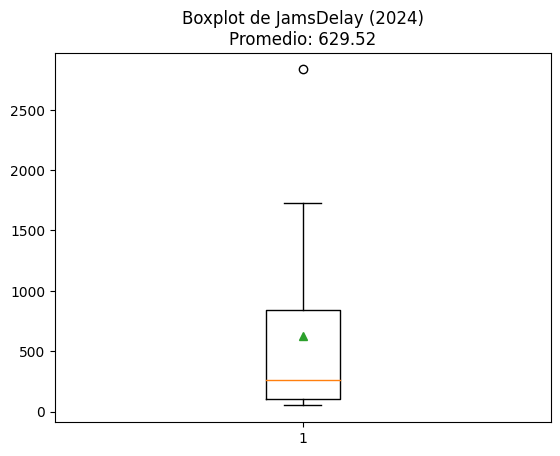

In [50]:
# Crear boxplot para observar el comportamiento de los minutos de congestion JamsDelay
# crea tu gráfico

# obtener promedio para mostrarlo en título
mean_value = merged['jams_delay'].mean()
plt.boxplot(merged['jams_delay'],showmeans=True)
plt.title(f'Boxplot de JamsDelay (2024)\nPromedio: {mean_value:.2f}')
plt.show()


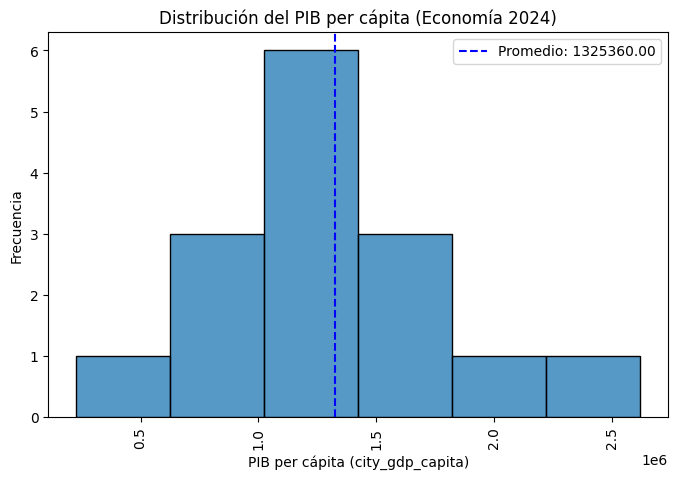

In [42]:
# Crear histograma para ver la distribución de la economía (city_gdp_capita)
plt.figure(figsize=(8, 5))
sns.histplot(merged['city_gdp_capita'])

# Línea del promedio
mean_gdp = merged['city_gdp_capita'].mean()
plt.axvline(mean_gdp, color='blue', linestyle='--', label=f'Promedio: {mean_gdp:.2f}')

plt.title('Distribución del PIB per cápita (Economía 2024)')
plt.xlabel('PIB per cápita (city_gdp_capita)')
plt.ylabel('Frecuencia')
plt.legend()
plt.xticks(rotation=90)
plt.show()


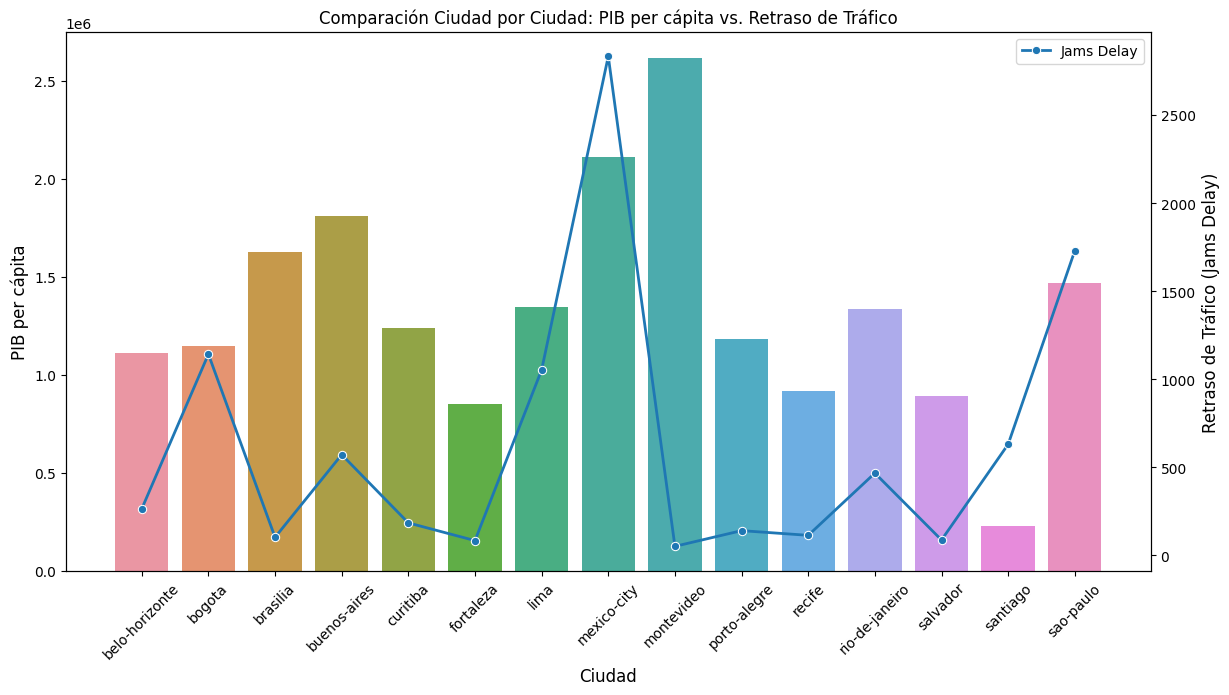

In [43]:
# Gráfico de barras para comparar jams_delay y city_gdp_capita por ciudad
# Tomamos una muestra o las primeras 15 ciudades para que el gráfico sea legible
df_plot = merged.head(15)

fig, ax1 = plt.subplots(figsize=(14, 7))

# Barras para el PIB
sns.barplot(x='city', y='city_gdp_capita', data=df_plot, ax=ax1, label='PIB per cápita')
ax1.set_ylabel('PIB per cápita', fontsize=12)
ax1.set_xlabel('Ciudad', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Eje secundario para el Tráfico
ax2 = ax1.twinx()
sns.lineplot(x='city', y='jams_delay', data=df_plot, ax=ax2, marker='o', label='Jams Delay', linewidth=2)
ax2.set_ylabel('Retraso de Tráfico (Jams Delay)', fontsize=12)

plt.title('Comparación Ciudad por Ciudad: PIB per cápita vs. Retraso de Tráfico')
plt.show()

**Tip:** Antes del `plt.show()` agrega el código `plt.xticks(rotation=90)` para rotar las etiquetas del eje X en 90 grados.

### 🧠 **Reflexiona**
Excelente trabajo llegando a esta etapa del análisis. Antes de avanzar, revisa tus gráficos, tómate un momento para pensar:

* ¿Las ciudades con mayor PIB per cápita también presentan más congestión?
* ¿O sucede lo contrario, o no existe una relación clara?






Escribe tus comentarios: 
* No existe una relación lineal directa o clara entre un mayor PIB per cápita y un mayor retraso por tráfico (Jams Delay). Al observar el gráfico comparativo:
    *   Contradicciones clave: La ciudad con el PIB per cápita más alto (Montevideo, con más de 2.5 millones) presenta uno de los  niveles de tráfico más bajos de la muestra.
    *   Casos opuestos: Ciudades como Mexico City muestran un PIB alto acompañado del pico máximo de congestión (casi 3000 en Jams Delay), pero otras como Sao Paulo tienen un PIB moderado y un tráfico significativamente alto.

* Valores Extremos (Outliers): El boxplot confirma la existencia de un valor atípico extremo en el tráfico que supera los 2500 puntos, duplicando el promedio.

* Distribución Económica: La mayoría de las ciudades se concentran en un rango de PIB entre 1.0 y 1.5 millones.

* Independencia de variables: La fluctuación de la línea azul (tráfico) no sigue la tendencia de las barras (PIB). Hay ciudades con barras bajas (PIB menor) que tienen puntos de tráfico más altos que ciudades con barras altas 



---

## 🧩Paso 7: Exportar y documentar resultados

En esta etapa final consolidarás todo tu trabajo: guardarás el dataset limpio y crearás un resumen que documente los resultados del proyecto.

### 7.1 Guardar dataset final

**🎯Objetivo:**
Generar un CSV limpio, reproducible y con columnas relevantes para análisis posterior.

**Instrucciones**

- Exporta el DataFrame `merged` con el nombre: `ladb_mobility_economy_2024_clean.csv`
- Usa `index=False` para no incluir el índice.


In [52]:
# Exporta el dataset final como CSV
merged.to_csv("ladb_mobility_economy_2024_clean.csv", index=False)

Para poder ver o descargar el archivo generado:   
En el menú lateral que esta a la izquierda, ve hasta la parte de abajo, a la sección de **Exportar dataset** para más información. 


---

## ✅ Entregables

1. **Notebook `.ipynb`** con todas las celdas (código + comentarios).
2. **CSV final**: `ladb_mobility_economy_2024_clean.csv`.
3. **Resumen ejecutivo breve** en Markdown (3–5 párrafos).



---

# 🧾 Resumen ejecutivo (plantilla)

> Completa este resumen al finalizar el análisis. Mantén 3–5 párrafos cortos, claros y accionables.

**Contexto & objetivo:**  
Este análisis busca entender cómo se relaciona la movilidad urbana, medida a partir de los niveles de congestión y los tiempos de retraso, con la productividad económica, representada por el PIB per cápita, en las principales ciudades de América Latina. La intención es detectar si el tráfico en niveles críticos está frenando el desarrollo económico, utilizando variables como jams_delay (retraso por congestión) y city_gdp_capita. A partir de estos hallazgos, se pretende orientar la priorización de inversiones en infraestructura de transporte que ayuden a optimizar el tiempo de los ciudadanos y mejorar la eficiencia operativa de las ciudades.

**Cobertura de datos:**  
- El estudio se centra en el año 2024, integrando más de 30 registros económicos de la OECD y un dataset masivo de tráfico global de TomTom. La cobertura geográfica incluye siete naciones estratégicas: Uruguay (URY), México (MEX), Argentina (ARG), Brasil (BRA), Perú (PER), Colombia (COL) y Chile (CHL). El análisis final se focalizó en las ciudades más representativas de estos países, permitiendo una comparación directa entre potencias regionales y centros urbanos en desarrollo.

**Metodología (alto nivel):**  
- El proceso inició con la limpieza y estandarización de la información, incluyendo la conversión de tipos de datos y la normalización de nombres de variables a formato snake_case para asegurar consistencia en el análisis.

- Durante esta etapa se identificó que las columnas City GDP/capita, Unemployment %, PM2.5 y Population estaban en formato object, por lo que se convirtieron a float para permitir su correcta interpretación cuantitativa.

- En el dataframe traffic, las columnas UpdateTimeUTC y UpdateTimeUTCWeekAgo también se encontraban como object y se transformaron a tipo datetime. Asimismo, JamsCount, que según el directorio de datos debía ser un valor entero, estaba definido como float y se ajustó a tipo integer.

- Posteriormente, se realizó una agregación por ciudad-año para obtener promedios anuales de tráfico, los cuales se integraron con los indicadores económicos mediante una unión tipo INNER, considerando únicamente registros comparables.

- Finalmente, se aplicaron validaciones visuales como gráficos de dispersión y diagramas de caja que permitieron identificar tendencias generales, detectar valores atípicos (outliers) y reducir su impacto en la interpretación de los resultados.

**Hallazgos iniciales:**  

-Se identificó que la congestión vehicular no necesariamente refleja una mayor actividad económica, sino que en muchos casos evidencia ineficiencias estructurales en la movilidad urbana. Ciudad de México sobresale como un valor atípico extremo en tiempos de retraso, mientras que ciudades como Bogotá, Lima y São Paulo presentan niveles de tráfico comparables a los de economías desarrolladas, pero con una productividad significativamente menor, lo que sugiere una pérdida sustancial de valor económico.

-En este contexto, el incremento del tráfico en varias economías emergentes no se traduce en mayor generación de riqueza, sino en una reducción de horas-hombre efectivas, afectando la eficiencia operativa, la competitividad y el crecimiento de la productividad urbana. Este comportamiento subraya la necesidad de priorizar intervenciones en movilidad que, además de disminuir la congestión, produzcan impactos económicos medibles.

**Recomendaciones**  

Basado en el análisis de eficiencia urbana y productividad, se sugieren las siguientes acciones:

-Modelos de Referencia (Alto PIB / Bajo Retraso): Ciudades como Montevideo y, en menor medida, Santiago, destacan por mantener indicadores de productividad elevados con niveles de congestión controlados. Estas ciudades deben ser estudiadas como referentes regionales de planificación urbana y gestión de demanda, ya que demuestran que es posible alcanzar altos niveles de desarrollo sin colapsar la movilidad.

-Prioridad por Desproporción (Bogotá y Lima): Aunque estas capitales poseen un PIB per cápita competitivo, su balance es alarmante: sufren retrasos vehiculares dignos de potencias mundiales sin tener aún la riqueza acumulada para absorber ese costo. Se recomienda priorizar la inversión en infraestructura de transporte masivo aquí para "liberar" el potencial económico atrapado en el tráfico.

-Foco en Impacto Regional (Sao Paulo): Dada su magnitud como motor económico, cualquier reducción en su índice de congestión tiene un impacto directo y masivo en el PIB regional. Es la ciudad con mayor retorno de inversión potencial debido a su escala.

-Validación y Siguientes Pasos: Es imperativo cruzar estos hallazgos con datos de inversión pública actual para identificar si el problema es de falta de recursos o de gestión de la infraestructura existente. Se sugiere un análisis de "Costo de Oportunidad" para cuantificar la pérdida económica exacta por hora-hombre en las ciudades de mayor retraso.
